In [1]:
!pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.3/351.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.1/796.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.8/692.8 kB 36.9 MB/s eta 0:00:00


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import os
import awkward as ak
from ipywidgets import interact, IntSlider

In [31]:
# opens the file

file_path = "output.root"

if os.path.getsize(file_path) == 0:
    raise ValueError(f"File is empty: {file_path}")

file = uproot.open(file_path)

# Basic Energy Plots:

In [32]:
# choose PhotonHits Tree
photon_hits = file["PhotonHits"]

In [33]:
photon_branches = photon_hits.arrays()
photon_branches

<Array [{EventID: 7, ...}, {...}, ..., {...}] type='101225 * {EventID: int3...'>

In [34]:
# converts to pandas dataframe:
photon_branches = ak.to_dataframe(photon_branches)
photon_branches

,EventID,PhotonEnergy,PhotonX,PhotonY,MissedMass
entry,,,,,
0,7,0.259646,-37.124452,39.984297,0.0
1,26,0.105320,20.303346,8.347962,0.0
2,32,1.470804,4.458329,-15.291926,0.0
3,52,1.186097,11.564657,-10.419494,0.0
4,87,318.486860,15.374634,-3.945507,0.0
...,...,...,...,...,...
101220,999944,0.327313,0.843639,-0.614705,0.0
101221,999955,510.104473,-1.931458,10.854190,0.0
101222,999957,0.082071,6.826860,-5.269552,0.0


In [35]:
np.max(photon_branches["PhotonEnergy"])

550.2344840383672

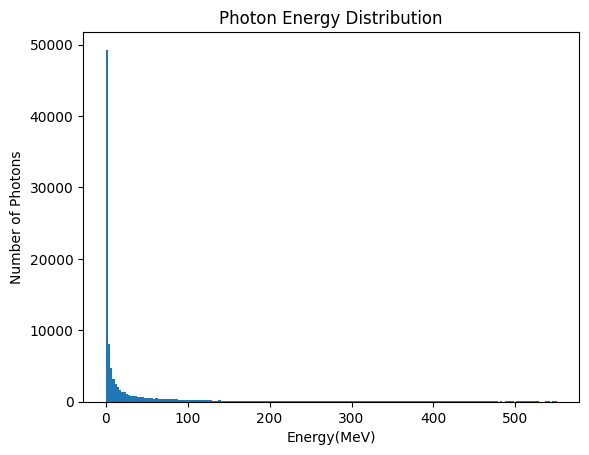

In [36]:
# energy plots for photons

plt.hist(photon_branches['PhotonEnergy'], bins=200)
plt.title('Photon Energy Distribution')
plt.xlabel('Energy(MeV)')
plt.ylabel('Number of Photons')
plt.show()

In [37]:
positron_hits = file['PositronHits']

In [38]:
positron_branches = positron_hits.arrays()
positron_branches

<Array [{EventID: 0, ...}, {...}, ..., {...}] type='994374 * {EventID: int3...'>

In [39]:
positron_branches = ak.to_dataframe(positron_branches)
positron_branches

,EventID,PositronEnergy,PositronX,PositronY
entry,,,,
0,0,549.502737,-8.326620,74.538383
1,1,549.399261,-2.283464,74.864432
2,2,549.556528,19.684844,75.061192
3,3,549.488715,10.200200,75.007476
4,4,549.555305,-5.933024,74.976307
...,...,...,...,...
994369,999995,549.556179,-14.064996,75.011940
994370,999996,524.225612,-4.199701,47.570861
994371,999997,549.447173,-1.800303,74.942956


In [40]:
def plot_histo(bins, min_value):
  plt.hist(positron_branches["PositronEnergy"], bins=bins, range=(min_value, 550))
  plt.title('Positron Energy Distribution')
  plt.xlabel('Energy (MeV)')
  plt.ylabel('Number of Positrons')
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=500),min_value=IntSlider(min=265, max=550, step=1, value=548))

interactive(children=(IntSlider(value=500, description='bins', max=550, min=1), IntSlider(value=548, descripti…

<function __main__.plot_histo(bins, min_value)>

# Number of Particles Analysis:

In [41]:
particles_in_event = file['ParticlesInEvent']

In [42]:
nParticles_branch = particles_in_event.arrays()
nParticles_branch

<Array [{EventID: 0, ...}, {...}, ..., {...}] type='1000000 * {EventID: int...'>

In [43]:
nParticles_branch = ak.to_dataframe(nParticles_branch)
nParticles_branch = pd.merge(nParticles_branch, photon_branches, on='EventID')
nParticles_branch

,EventID,NumberOfPhotons,NumberOfPositrons,PhotonEnergy,PhotonX,PhotonY,MissedMass
0,7,1.0,1.0,0.259646,-37.124452,39.984297,0.0
1,26,1.0,1.0,0.105320,20.303346,8.347962,0.0
2,32,1.0,1.0,1.470804,4.458329,-15.291926,0.0
3,52,1.0,1.0,1.186097,11.564657,-10.419494,0.0
4,87,1.0,0.0,318.486860,15.374634,-3.945507,0.0
...,...,...,...,...,...,...,...
101220,999944,1.0,1.0,0.327313,0.843639,-0.614705,0.0
101221,999955,1.0,0.0,510.104473,-1.931458,10.854190,0.0
101222,999957,1.0,1.0,0.082071,6.826860,-5.269552,0.0
101223,999983,1.0,1.0,0.631382,8.346120,3.423017,0.0


In [44]:
evts_one_photon = nParticles_branch[nParticles_branch['NumberOfPhotons'] == 1.0]
evts_two_photons = nParticles_branch[nParticles_branch['NumberOfPhotons'] == 2.0]
evts_three_photons = nParticles_branch[nParticles_branch['NumberOfPhotons'] == 3.0]

In [45]:
evts_one_photon

,EventID,NumberOfPhotons,NumberOfPositrons,PhotonEnergy,PhotonX,PhotonY,MissedMass
0,7,1.0,1.0,0.259646,-37.124452,39.984297,0.0
1,26,1.0,1.0,0.105320,20.303346,8.347962,0.0
2,32,1.0,1.0,1.470804,4.458329,-15.291926,0.0
3,52,1.0,1.0,1.186097,11.564657,-10.419494,0.0
4,87,1.0,0.0,318.486860,15.374634,-3.945507,0.0
...,...,...,...,...,...,...,...
101220,999944,1.0,1.0,0.327313,0.843639,-0.614705,0.0
101221,999955,1.0,0.0,510.104473,-1.931458,10.854190,0.0
101222,999957,1.0,1.0,0.082071,6.826860,-5.269552,0.0
101223,999983,1.0,1.0,0.631382,8.346120,3.423017,0.0


# Plots for events with one, two and three photons

In [46]:
def plot_histo(bins):
  plt.hist(evts_one_photon["PhotonEnergy"], bins=bins)
  plt.title("Energy Distribution for Events With one Photon")
  plt.xlabel("Energy(MeV)")
  plt.ylabel("Number of Photons")
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=200))

interactive(children=(IntSlider(value=200, description='bins', max=550, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_histo(bins)>

In [47]:
def plot_histo(bins):
  plt.hist(evts_two_photons["PhotonEnergy"], bins=bins)
  plt.title("Energy Distribution for Events With two Photons")
  plt.xlabel("Energy(MeV)")
  plt.ylabel("Number of Photons")
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=200))

interactive(children=(IntSlider(value=200, description='bins', max=550, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_histo(bins)>

In [48]:
evts_three_photons

,EventID,NumberOfPhotons,NumberOfPositrons,PhotonEnergy,PhotonX,PhotonY,MissedMass
1168,11255,3.0,1.0,10.272730,1.948625,-5.999698,0.0
1169,11255,3.0,1.0,9.035043,-4.499786,-10.654368,0.0
1170,11255,3.0,1.0,1.712599,0.777672,6.710383,0.0
1281,12282,3.0,1.0,42.988317,24.771352,-2.583186,0.0
1282,12282,3.0,1.0,3.150635,-59.649567,16.411141,0.0
...,...,...,...,...,...,...,...
101100,998694,3.0,1.0,8.177122,1.840383,0.913256,0.0
101101,998694,3.0,1.0,0.139570,-4.440320,2.869571,0.0
101191,999525,3.0,1.0,0.405149,-7.180670,-10.051211,0.0
101192,999525,3.0,1.0,0.115000,-9.175698,8.291473,0.0


In [49]:
def plot_histo(bins):
  plt.hist(evts_three_photons["PhotonEnergy"], bins=bins)
  plt.title("Energy Distribution for Events With three Photons")
  plt.xlabel("Energy(MeV)")
  plt.ylabel("Number of Photons")
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=200))

interactive(children=(IntSlider(value=200, description='bins', max=550, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_histo(bins)>

# Plots for events with one, two and three photons but no positrons

In [50]:
evts_one_photon_no_positrons = evts_one_photon[evts_one_photon['NumberOfPositrons'] == 0.0]
evts_two_photon_no_positrons = evts_two_photons[evts_two_photons['NumberOfPositrons'] == 0.0]
evts_three_photon_no_positrons = evts_three_photons[evts_three_photons['NumberOfPositrons'] == 0.0]

evts_one_photon_no_positrons

,EventID,NumberOfPhotons,NumberOfPositrons,PhotonEnergy,PhotonX,PhotonY,MissedMass
4,87,1.0,0.0,318.486860,15.374634,-3.945507,0.0
11,122,1.0,0.0,432.984736,0.090752,3.889969,0.0
20,222,1.0,0.0,327.935446,5.716788,8.536738,0.0
39,442,1.0,0.0,404.822471,3.346866,-6.002618,0.0
84,775,1.0,0.0,383.559905,-44.943656,28.172858,0.0
...,...,...,...,...,...,...,...
101073,998484,1.0,0.0,457.021274,6.155917,13.198130,0.0
101094,998649,1.0,0.0,409.302350,-1.492506,5.226107,0.0
101195,999569,1.0,0.0,347.504155,-18.365835,-19.330028,0.0
101206,999720,1.0,0.0,427.758427,15.610996,-0.621610,0.0


In [51]:
def plot_histo(bins):
  plt.hist(evts_one_photon_no_positrons["PhotonEnergy"], bins=bins)
  plt.title("Energy Distribution for Events With one Photon and no Positrons")
  plt.xlabel("Energy(MeV)")
  plt.ylabel("Number of Photons")
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=200))

interactive(children=(IntSlider(value=200, description='bins', max=550, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_histo(bins)>

In [52]:
def plot_histo(bins):
  plt.hist(evts_two_photon_no_positrons["PhotonEnergy"], bins=bins)
  plt.title("Energy Distribution for Events With two Photons and no Positrons")
  plt.xlabel("Energy (MeV)")
  plt.ylabel("Number of Photons")
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=200))

interactive(children=(IntSlider(value=200, description='bins', max=550, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_histo(bins)>

In [53]:
np.size(evts_two_photon_no_positrons["PhotonEnergy"])

744

In [54]:
evts_three_photon_no_positrons

,EventID,NumberOfPhotons,NumberOfPositrons,PhotonEnergy,PhotonX,PhotonY,MissedMass
1301,12465,3.0,0.0,0.120936,30.645696,30.142840,0.0
1302,12465,3.0,0.0,310.048134,11.522763,-1.688705,0.0
1303,12465,3.0,0.0,0.850513,17.123573,12.134167,0.0
1717,16793,3.0,0.0,308.400409,-7.099708,-0.874218,0.0
1718,16793,3.0,0.0,0.967200,-13.145756,-42.862880,0.0
1719,16793,3.0,0.0,5.394071,12.921442,-1.884673,0.0
10986,107911,3.0,0.0,0.123249,-34.431448,-4.601512,0.0
10987,107911,3.0,0.0,3.506860,-26.516445,-6.218445,0.0
10988,107911,3.0,0.0,293.210206,4.002696,8.628046,0.0
16773,165575,3.0,0.0,21.307530,12.166259,23.111256,0.0


In [55]:
def plot_histo(bins):
  plt.hist(evts_three_photon_no_positrons["PhotonEnergy"], bins=bins)
  plt.title("Energy Distribution for Events With Three Photons and no Positrons")
  plt.xlabel("Energy(MeV)")
  plt.ylabel("Number of Photons")
  plt.show()

interact(plot_histo, bins=IntSlider(min=1, max=550, step=1, value=200))

interactive(children=(IntSlider(value=200, description='bins', max=550, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_histo(bins)>